In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_moons
from sklearn.datasets.samples_generator import make_s_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
#from sklearn.preprocessing import MinMaxScaler

In [ ]:
Subb's Mart is a retail chain which covers a significant part of the city. It has a presence
across a varied set of locations involving different classes and segments of customers. The
merchandise presented in the store aisles and the spending capacity varies based on these
locations.
Subb's Mart is known as a retailer with good technological adaptation. Being one of the
prominent retailers in the city, Subb's Mart wants to engage with their customers in order to
provide a better experience for them. Given the advent of Machine learning is in the spree,
Subb's Mart wants to adopt better understanding their customers and provide what they need
the most and give them a good set of options for an enriching shopping experience.

Attached is the bills for a different set of customers, product masters. Try avoiding any pre-
existing boxed algorithms.

Inputs provided (Attached zip has the following datasets)
1. Articles - Master of items with name and item code for each stores
2. Stores - Store identifier and name
3. Article Hierarchy - Categorisation
4. Customers - Customer name, tel by store
5. Bills - 3 months bills by store
What do we expect? (Solve any one of the below)
A. Find the common monthly basket across customers. (Hint: is this a basket of specific items
or a basket of groups?). Monthly baskets are the one time large baskets that people tend to
buy at the start of the month(but not strictly in that period)
B. Find the items that can be sold in combo and the reason for these items to coexist in the
combo.
How should it be presented?
1. For A, Constituents on the monthly basket and for B, List of top combo items, its purpose
and reach. Both output should be served over HTTP as JSON using a web-server and boot up
should be fast, for both challenges, think of how you would present the common monthly
basket and the combo suggestions to the owner of Subb’s mart and structure JSON based on
that (no UI required).
2. The code that is used to build this. We will try validating it with different set of data which
we internally have. The code quality, levers identified are specially considered more than the
actual output.
Hint: We are not looking for one solution as there can be multiple ideal solutions that can be
picked from the list of possibilities, your approach narrow down on an ideal set of options
along with the reasoning is what will get us interested
Tech stack
Use any language that you like, you code should be buildable and runnable on Linux - no
proprietary stacks.

In [58]:
data1=pd.read_csv("articles.csv")
data2=pd.read_csv("article_hierarchy.csv")
data3=pd.read_csv("bills.csv")
data4=pd.read_csv("customers.csv")
data5=pd.read_csv("stores.csv")



In [121]:
data=data2.merge(data3)
data=data.dropna()


In [122]:

y=data['store_id']
Y=y.ravel()
Y=Y-2
Y                                                         //Target

array([1, 1, 1, ..., 3, 2, 2])

In [130]:

x=data.drop(columns=['store_id'])                  

X=scale(x)                                                  //Feature X

X

array([[-1.11069089, -1.32168535, -0.37934815, ..., -0.44066797,
        -0.59348105,  1.05077874],
       [-1.11069089, -1.32168535, -0.37934815, ..., -0.44021598,
        -0.59348105, -0.47009582],
       [-1.11069089, -1.32168535, -0.37934815, ..., -0.44203762,
        -0.59348105, -0.64708371],
       ...,
       [ 2.33912724,  1.17391355, -0.30604979, ...,  0.54411361,
         0.46152699, -0.70736067],
       [ 2.33938571, -0.82035707, -0.43265605, ..., -0.52147758,
        -0.60216812,  1.48945813],
       [ 2.33977342, -0.65692847, -0.48929569, ...,  3.46969561,
         2.07141363, -0.98931997]])

In [133]:
clustering=KMeans(n_clusters=4,random_state=5,max_iter=1000)
clustering.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [134]:
x=data['store_id']
y=data['brand']
clustering.labels_

array([3, 0, 0, ..., 1, 3, 2], dtype=int32)

In [135]:

color_theme=np.array(['yellow','green','red','orange'])


[3 0 0 ... 1 3 2]


Text(0.5,1,'kmeans classification')

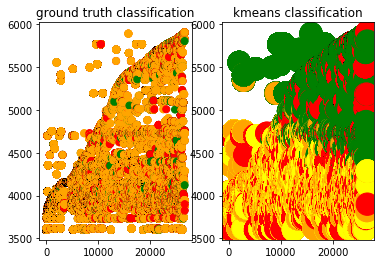

In [137]:
relabel1=np.choose(clustering.labels_,[0,1,2,3]).astype(np.int64)
print(relabel1)
plt.subplot(1,2,1)
plt.scatter(x=data['article_id'],y=data['brand'],c=color_theme[Y],s=50)
plt.title("ground truth classification")
plt.subplot(1,2,2)
plt.scatter(x=data['article_id'],y=data['brand'],c=color_theme[clustering.labels_],s=500)
plt.title("kmeans classification")

In [138]:
print(classification_report(Y,relabel1))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.34      0.08      0.13    274502
          2       0.31      0.06      0.10    218639
          3       0.48      0.44      0.46    254594

avg / total       0.38      0.20      0.23    747735



/home/krishna/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
